## Imports

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.api as sm


from google.colab import files
import io
from IPython.display import clear_output
clear_output()


## Carga del dataset

In [ ]:
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['student_habits_performance.csv']))
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Descripción del dataset

In [ ]:
print(df[df.parental_education_level.isnull()])

    student_id  age  gender  study_hours_per_day  social_media_hours  \
10       S1010   19  Female                  4.6                 3.7   
33       S1033   18  Female                  4.0                 0.9   
47       S1047   23  Female                  2.5                 2.9   
74       S1074   21  Female                  2.3                 1.0   
93       S1093   22    Male                  4.1                 2.5   
..         ...  ...     ...                  ...                 ...   
921      S1921   23  Female                  4.4                 2.7   
925      S1925   19   Other                  1.7                 2.9   
939      S1939   18  Female                  4.7                 3.2   
945      S1945   23    Male                  6.0                 2.9   
967      S1967   22    Male                  5.2                 4.1   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
10             0.8            No                   77.6        

### 91 datos de la serie parental_education_level son valores nulos, y representan el 9,1% de los datos, nos conviene imputarlos con la moda de dicha serie. Si es bimodal, asignaremos aleatoriamente los dos valores, respetando su proporción.

## Analisis de la variable parental_education_level

In [ ]:
# Extraemos la serie
educacionPadres = df['parental_education_level']

In [ ]:
# Comprobamos cuantas veces aparece cada categoria dentro de la serie
conteo = educacionPadres.value_counts(dropna=False) # para q me muestre los Nan
print(conteo)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64


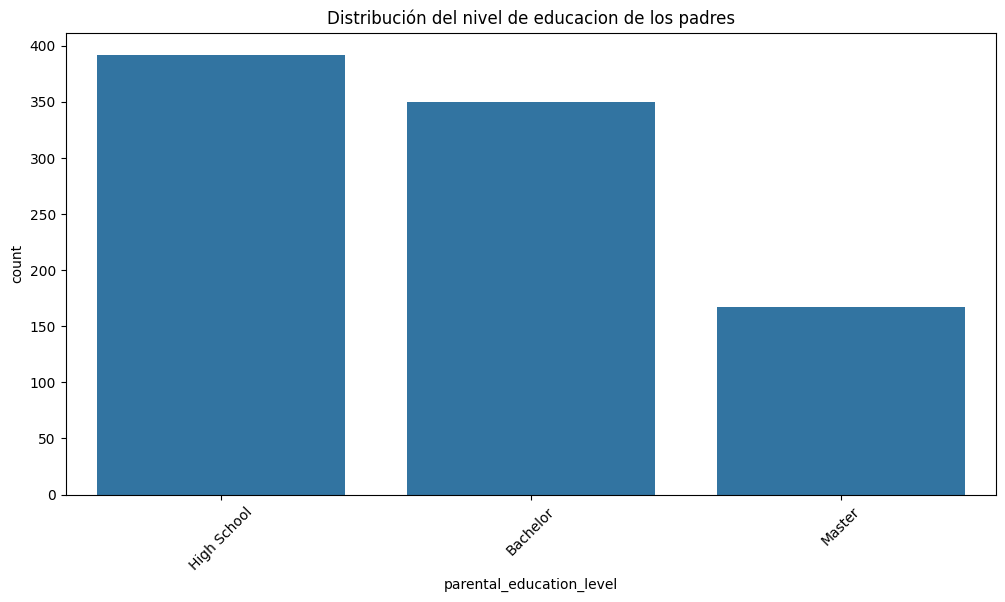

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'parental_education_level', order = educacionPadres.value_counts().index) #los Nan no se pueden graficar con sns
plt.title('Distribución del nivel de educacion de los padres')
plt.xticks(rotation = 45)
plt.show()

## Cálculo de proporciones para evaluar si es una Distribución Bimodalidad

In [ ]:
porcentajes = educacionPadres.value_counts(normalize = True,dropna=False)*100
print(porcentajes)

parental_education_level
High School    39.2
Bachelor       35.0
Master         16.7
NaN             9.1
Name: proportion, dtype: float64


### Claramente tenemos una Distribución Bimodal, con dos categorías, que representan el 74,2% de los datos, por lo tanto no es recomendado eliminar los valores Nan. Podemos agregar otra categoría que sea desconocida, pero sería agregar más datos, de los cuales no sabemos nada. Por otra parte, podemos imputar los Nan en relación a la proporción que hay con las 2 modas, esto es asignar los Nan aleatoriamente a "high_school" o "bachelor" respetando sus proporciones.


*   Ventaja: Mantiene la distribución original.
*   Desventaja: Introduce aleatoriedad.



In [ ]:
# Extraemos los Nan de la serie 'parental_education_level' por su indice
indices_nan = df[df['parental_education_level'].isna()].index

# como tenemos una lista de indices que tienen los nan de ''parental_education_level''
df.loc[indices_nan,'parental_education_level'] = np.random.choice(
    ['High School','Bachelor'],
    size = len(indices_nan),
    p = [0.392/0.742, 0.35/0.742]
) # esto agarra de la serie parental_education_level los indices que tienen Nan,
  # y le asigna aleatoriamente con np.random.choice el valor High school o Bachelor
  #size = len(indices_nan) hace q genere tantos valores aleatorios como tengo en indices nan (91)
  # p = .... como del total 0,742 es lo q representan los valores bimodales de este total saco el porcentaje
  # entonces me da la probabilidad proporcional a cada categoria segun su distribucion real. es la proporcion real digamos.


In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Distribución de la variable respuesta 'exam_score'

### Nos importa la distribución de la variable respuesta por:
1. Elección del modelo
Algunos algoritmos hacen supuestos sobre la distribución de la variable respuesta. Por ejemplo:

En regresión lineal, se asume que los residuos (errores) están normalmente distribuidos.

En regresión logística, se espera que la variable respuesta sea binaria o categórica.

En modelos probabilísticos (como Naive Bayes), la distribución afecta directamente las predicciones.

2. Transformaciones y normalización (para regresión)
Si la variable respuesta tiene una distribución muy sesgada (skewed), puede perjudicar el rendimiento de algunos modelos. En ese caso, se pueden aplicar transformaciones como:

Logarítmica (log(y)),

Box-Cox,

Raíz cuadrada, etc.

Estas transformaciones ayudan a que el modelo aprenda mejor si se necesita una distribución más normal.
3. Evaluación y validación
Conocer la distribución ayuda a:

Dividir mejor los datos (por ejemplo, usar estratificación si hay clases desbalanceadas),

Interpretar correctamente errores o métricas,

Detectar si el modelo sobreajusta o no generaliza bien en ciertas partes del espacio de salida.
4. Interpretabilidad
Saber cómo se distribuye la variable objetivo permite:

Identificar outliers o valores atípicos,

Detectar patrones anómalos,

Ajustar expectativas sobre el modelo (por ejemplo, si la mayoría de los valores de y están entre 10 y 20, pero hay algunos de 1000, podrías necesitar un enfoque especial).




<Axes: xlabel='exam_score', ylabel='Density'>

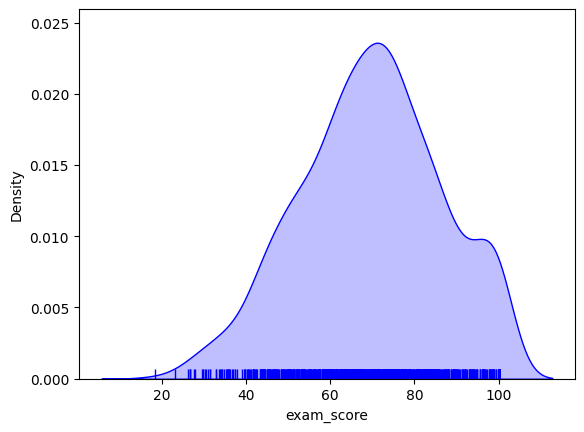

In [ ]:
sns.kdeplot(
    df.exam_score,
    fill =True,
    color = 'blue',
)
sns.rugplot(
    df.exam_score,
    color ='blue'
)


## Vemos un sesgo positivo y q los datos estan muy aglomerados entorno a la media, como es esta variable la que nos interesa predecir. queremos de q sea lo mas normal en lo posible para tener mejor control sobre la variable, entonces normalizamos los datos.. vamos a aplicar una normalizacion logaritmica y de raiz cuadrada para comparar.

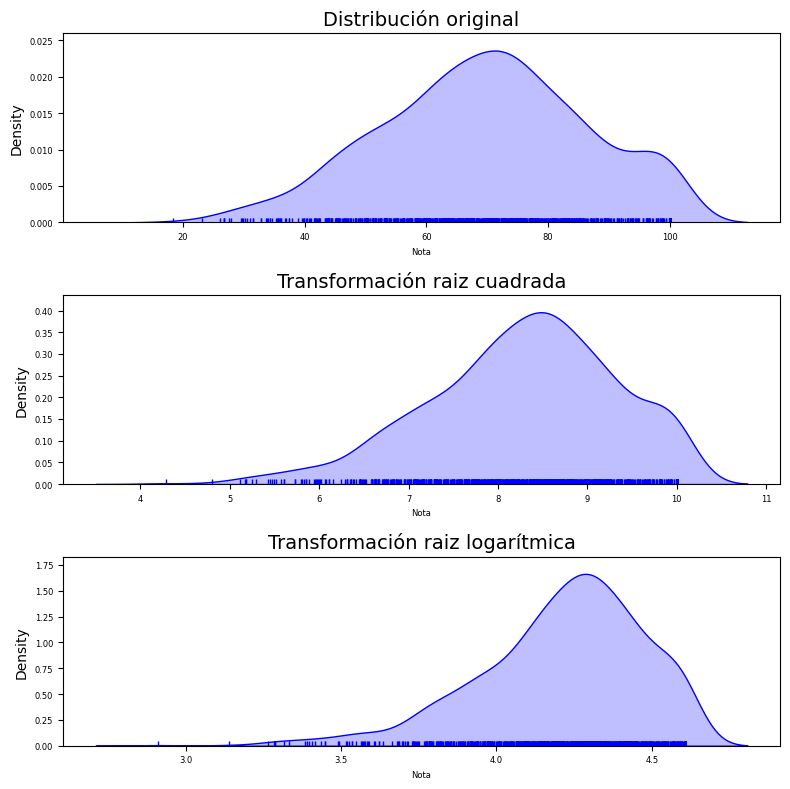

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8,8))
sns.kdeplot(
    df.exam_score,
    fill = True,
    color ='blue',
    ax = axes[0]
)
sns.rugplot(
    df.exam_score,
    color = 'blue',
    ax = axes[0]
)
axes[0].set_title('Distribución original', fontsize =14 )
axes[0].set_xlabel('Nota', fontsize = 6)
axes[0].tick_params(labelsize = 6)

#----------------------------------------------------------------
sns.kdeplot(
    np.sqrt(df.exam_score), # acá transformamos por raiz cuadrada.
    fill = True,
    color = 'blue',
    ax = axes[1]
)
sns.rugplot(
    np.sqrt(df.exam_score),# acá transformamos por raiz cuadrada.
    color = 'blue',
    ax = axes[1]
)
axes[1].set_title('Transformación raiz cuadrada',fontsize =14)
axes[1].set_xlabel('Nota',fontsize = 6)
axes[1].tick_params(labelsize = 6)
#---------------------------------------------------------------------
sns.kdeplot(
    np.log(df.exam_score), # acá transformamos por log cuadrada.
    fill = True,
    color = 'blue',
    ax = axes[2]
)
sns.rugplot(
    np.log(df.exam_score),# acá transformamos por log.
    color = 'blue',
    ax = axes[2]
)
axes[2].set_title('Transformación raiz logarítmica',fontsize =14)
axes[2].set_xlabel('Nota',fontsize = 6)
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
!pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install fitter
import numpy as np
import pandas as pd
from fitter import Fitter

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fitter 1.7.1 requires numpy<2.0.0,>=1.20.0, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
 

In [ ]:
from fitter import Fitter, get_common_distributions

## Para hacer una prueba a que distribucion se aproxima mas nuestra variable respuesta usamos fitter

In [ ]:

!pip install --upgrade fitter

In [ ]:
dist = ['chi2','cauchy', 'exponpow','expon','gamma','norm','powerlaw','beta','logistic']
fitter = Fitter(df.exam_score, distributions=dist)
fitter.fit()
fitter.summary(Nbest=10,plot = False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.005190,985.702409,995.517920,inf,0.035864,1.490117e-01
gamma,0.005201,993.216125,1007.939391,inf,0.039076,9.189001e-02
chi2,0.005255,996.480514,1011.203780,inf,0.041500,6.206239e-02
logistic,0.005271,981.866178,991.681688,inf,0.043740,4.229109e-02
beta,0.005544,972.664744,992.295765,inf,0.054228,5.370036e-03
cauchy,0.006324,1008.839400,1018.654911,inf,0.106730,2.252889e-10
powerlaw,0.007239,932.140185,946.863451,inf,0.142039,4.573714e-18
exponpow,0.015709,967.897851,982.621116,inf,0.299856,3.104356e-80
expon,0.018121,950.524097,960.339607,inf,0.331476,2.035064e-98


In [ ]:
print(fitter.get_best())

{'norm': {'loc': 69.6015, 'scale': 16.880117527730665}}


### **loc = 69.6015:**
Es el valor medio (μ) de la distribución → la media de los puntajes de examen.
### **scale = 16.8801:**
Es la desviación estándar (σ) → indica cuánto varían los puntajes respecto a la media.

## vemos que la distribución nomarl es la que mejor se ajusta, ya que la suma de los errores cuadráticos es la menor, los criterios de Akaike(aic) y Bayesiano (bic) que penalizan por complejidad de modelo son los mas bajos y el test de kolmogorov-Smirnov (ks-statistics) el cual mide la funcion distribucion acumulada real vs la teorica, osea por ejemplo, en la normal teorica me dice que el 25% está abajo de 65 puntos y mis datos dicen que el 30% estan por debajo, entonces hace esa diferencia. además el valor p para ks es mayor a 0.05 por lo tanto la distribución normal es la que mejor ajusta


---



## Análisis de variables cualitativas o categóricas


In [ ]:
df.select_dtypes(include=['object']).describe()

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,2,3,3,3,2
top,S1999,Female,No,Fair,High School,Good,No
freq,1,481,785,437,442,447,682


In [ ]:
dfCat= df.select_dtypes(include=['object'])
dfCat = dfCat.drop('student_id', axis=1)

In [ ]:
dfCat.head()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,Female,No,Fair,Master,Average,Yes
1,Female,No,Good,High School,Average,No
2,Male,No,Poor,High School,Poor,No
3,Female,No,Poor,Master,Good,Yes
4,Female,No,Fair,Master,Good,No


## Distribución de variables cualitativas

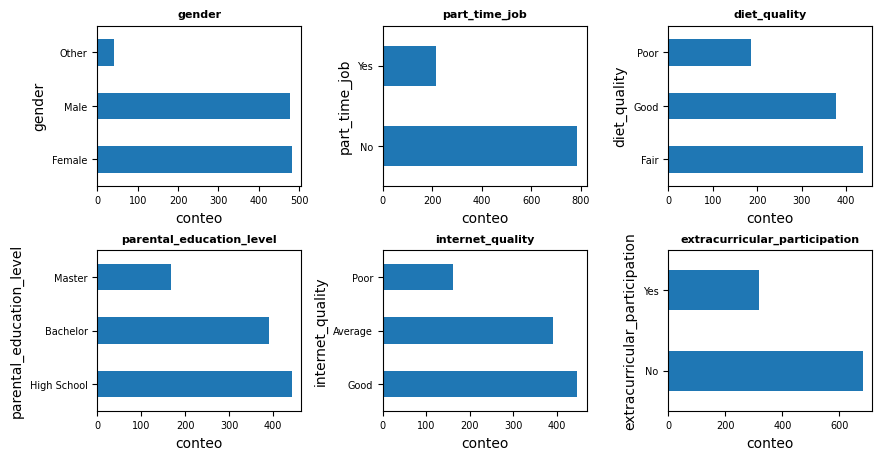

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize =(10,5))
axes = axes.flat #para poder usar el for con los plots
col_cualitativas = dfCat.columns

for i, colum in enumerate(col_cualitativas):
  dfCat[colum].value_counts().plot.barh(ax = axes[i])
  axes[i].set_title(colum, fontsize = 8, fontweight='bold')
  axes[i].tick_params(labelsize = 7)
  axes[i].set_xlabel("conteo")
fig.tight_layout
plt.subplots_adjust(hspace=0.4, wspace=0.4)

## Relacion entre las notas y las variables cualitativas

## esto lo vemos con un boxplot con su distribución o diagrama de violin 🎻

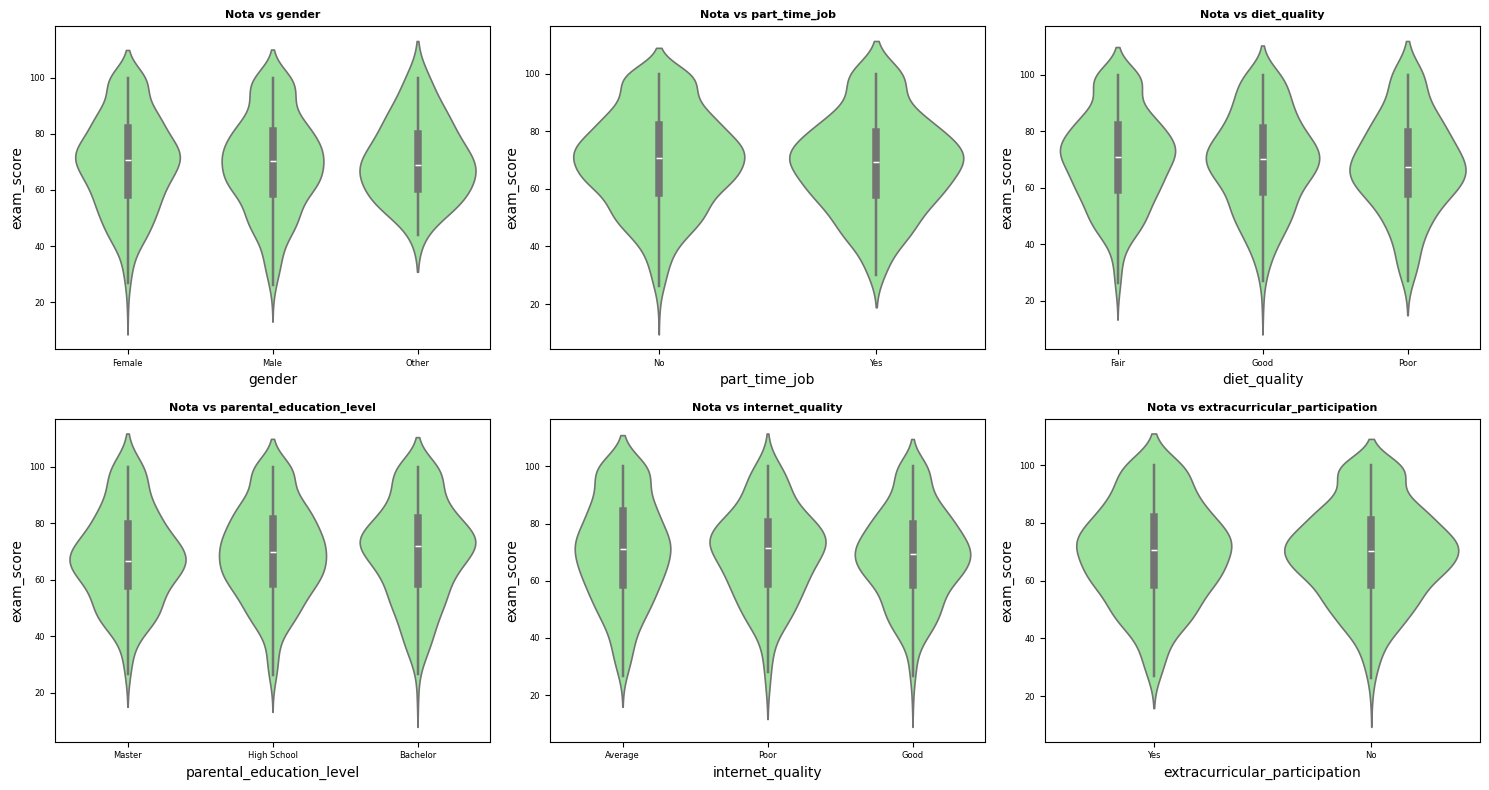

In [ ]:
df1 = df.drop('student_id', axis=1)
fig, axes = plt.subplots(nrows=2,ncols=3, figsize =(15,8))
axes = axes.flat
columnas_cualitativas = df1.select_dtypes(include=['object']).columns

for i, columna in enumerate(columnas_cualitativas):
  sns.violinplot(
      data = df1,
      x = columna,
      y = 'exam_score',
      inner='box',
      linewidth=1.2,
      color='lightgreen',
      #palette='Set3',
      #color = 'blue',
      ax = axes[i]

  )
  axes[i].set_title(f'Nota vs {columna}',fontsize = 8, fontweight = 'bold')
  axes[i].tick_params(labelsize = 6)
  fig.tight_layout()


## Tree Map 🌳

##Se nos hizo interesante mostrar la relación entre el nivel educativo de los padres y el rendimiento estudiantil en términos de género. En general, observamos que a medida que aumenta el nivel educativo de los padres, los puntajes de los estudiantes tienden a aumentar.

In [ ]:
fig = px.treemap(
    df,
    path=['parental_education_level', 'gender'],
    values='exam_score',
    color='exam_score',
    color_continuous_scale='Viridis',
    hover_data={
        'exam_score': True,         # Mostrar score exacto
        'sleep_hours': True,        # Horas de sueño
        'study_hours_per_day': True  # Horas de estudio
    },
    title='Score por Nivel Educativo de los Padres y Género'
)

fig.update_traces(
    textinfo='label+value+percent parent',  # Esto es más para go.Treemap, pero lo dejamos por compatibilidad
    texttemplate='%{label}<br>%{value:.1f}',  # Texto dentro del cuadro
    insidetextfont=dict(size=12)
)
import plotly.io as pio
pio.renderers.default = 'colab'
fig.show()

### **Cómo está relacionadas nuestras variables categóricas con los puntajes de examen? es decir dentro de una misma categoria dentro de mis variables cualitativas cambiara la nota? un alumno que trabaja media jornada tiene en promedio menos nota que uno que no lo hace?**

### Para responder esto vamos a realizar un test de la t de estudent para variables que tengan 2 categorias y comparar sus medias.
### Para variables que tengan 3 o mas categorias se utiliza el Analisisd de varianza ANOVA.

In [ ]:
from scipy.stats import ttest_ind, f_oneway

In [ ]:
dfPrueba = pd.concat([dfCat,df['exam_score']], axis = 1)

In [ ]:
dfPrueba.head()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation,exam_score
0,Female,No,Fair,Master,Average,Yes,56.2
1,Female,No,Good,High School,Average,No,100.0
2,Male,No,Poor,High School,Poor,No,34.3
3,Female,No,Poor,Master,Good,Yes,26.8
4,Female,No,Fair,Master,Good,No,66.4


In [ ]:
var_objetivo = 'exam_score'
var_categoricas = ['diet_quality', 'parental_education_level', 'internet_quality',
            'part_time_job', 'extracurricular_participation', 'gender']

resultados = []

# hacemos un for para que vaya aplicando t-student o anova segun las keys que tiene cada categoria
# guardamos en resultados cada variable categorica el tipo de test que se le hizo, el valor p de significancia y si es significativo o no
#luego graficamos los resultados delos significativos

for var in var_categoricas:
  grupos = dfPrueba.groupby(var)[var_objetivo]
  categorias = grupos.groups.keys()

  if len(categorias) == 2:
        grupo1 = grupos.get_group(list(categorias)[0])
        grupo2 = grupos.get_group(list(categorias)[1])
        stat, p = ttest_ind(grupo1, grupo2)
        nombre_test = 't-test'

  elif len(categorias) > 2:
        valores = [grupo for _, grupo in grupos]
        stat, p = f_oneway(*valores) # * me descomprime la lista para poder usarla en f_oneway (ANNOVA)
        nombre_test = 'ANOVA'
  else:
        continue

  resultados.append({
        'variable': var,
        'test': nombre_test,
        'p_valor': p,
        'significativo': p < 0.05
    })

# pasamos a dataframe los resultados

df_resultado = pd.DataFrame(resultados)
res_signif = df_resultado[df_resultado['significativo'] == True].sort_values(by='p_valor')







In [ ]:
### como no tuvimos variables significativas ponemos prints para ver los p valor
for var in var_categoricas:
    grupos = df.groupby(var)[var_objetivo]
    categorias = grupos.groups.keys()
    print(f"\nAnalizando variable: {var} - categorías: {list(categorias)}")

    if len(categorias) == 2:
        grupo1 = grupos.get_group(list(categorias)[0])
        grupo2 = grupos.get_group(list(categorias)[1])
        print(f"Tamaño grupos: {len(grupo1)} y {len(grupo2)}")
        stat, p = ttest_ind(grupo1, grupo2)
        test_name = 't-test'
    elif len(categorias) > 2:
        valores = [grupo for _, grupo in grupos]
        print(f"Cantidad de grupos: {len(valores)}")
        stat, p = f_oneway(*valores)
        test_name = 'ANOVA'
    else:
        print("No se puede comparar, solo hay una categoría")
        continue

    print(f"p-valor: {p:.4f}")
    resultados.append({
        'variable': var,
        'test': test_name,
        'p_valor': p,
        'significativo': p < 0.05
    })


Analizando variable: diet_quality - categorías: ['Fair', 'Good', 'Poor']
Cantidad de grupos: 3
p-valor: 0.2824

Analizando variable: parental_education_level - categorías: ['Bachelor', 'High School', 'Master']
Cantidad de grupos: 3
p-valor: 0.3412

Analizando variable: internet_quality - categorías: ['Average', 'Good', 'Poor']
Cantidad de grupos: 3
p-valor: 0.2320

Analizando variable: part_time_job - categorías: ['No', 'Yes']
Tamaño grupos: 785 y 215
p-valor: 0.4006

Analizando variable: extracurricular_participation - categorías: ['No', 'Yes']
Tamaño grupos: 682 y 318
p-valor: 0.9778

Analizando variable: gender - categorías: ['Female', 'Male', 'Other']
Cantidad de grupos: 3
p-valor: 0.8674


### Estos p-valores altos (todos mayores a 0.05) indican que no hay evidencia estadísticamente significativa de que las variables categóricas estén asociadas con el puntaje del examen (exam_score)

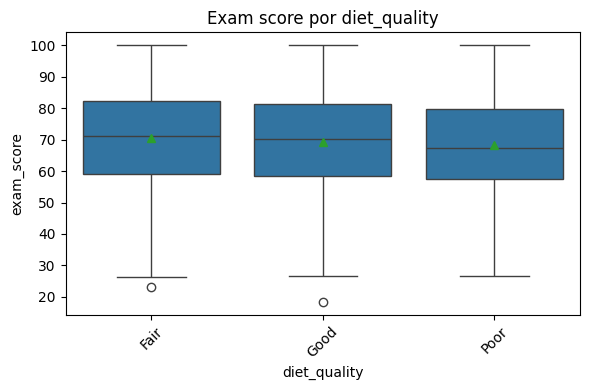

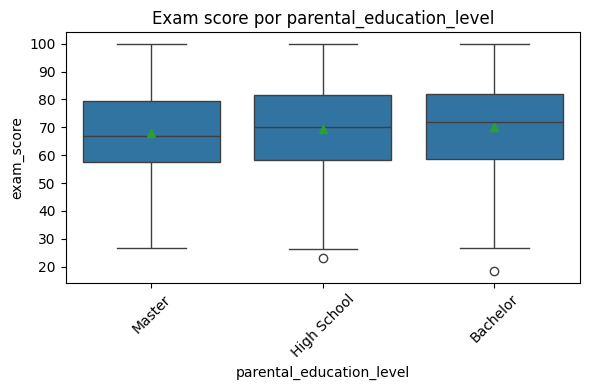

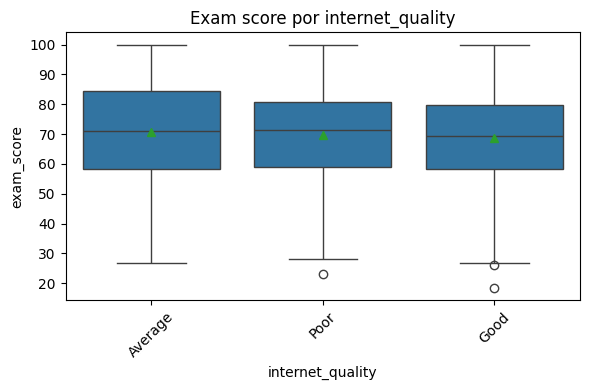

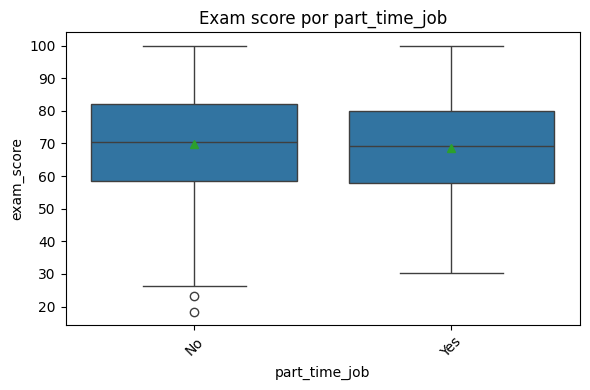

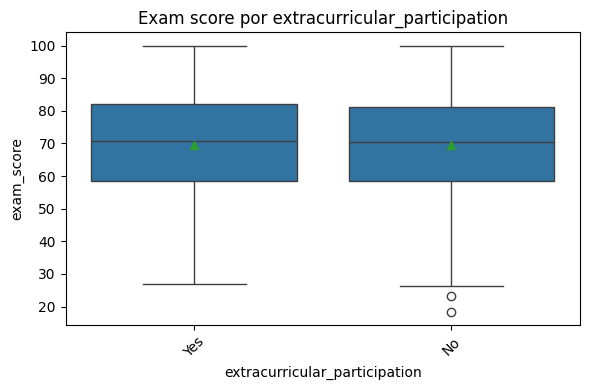

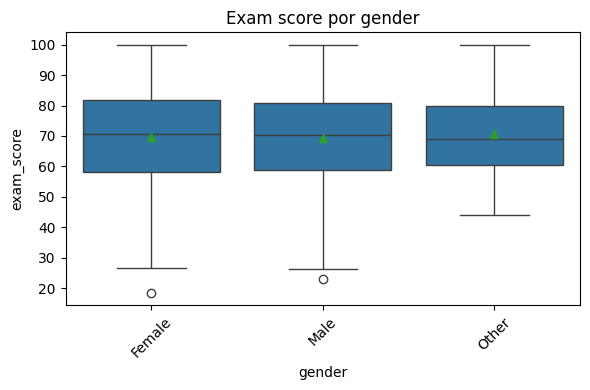

In [ ]:

for var in var_categoricas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=var, y='exam_score',showmeans=True)
    plt.title(f'Exam score por {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

La nota (exam_score) se comporta de forma similar sin importar el género, si tienen trabajo de medio tiempo, la calidad del internet, etc.

Puede que estas variables no influyan directamente en el rendimiento académico medido por ese puntaje.

O bien, puede que influyan indirectamente o en combinación con otras que no estamos incluyendo (por ejemplo, salud mental, horas de estudio, motivación, etc.)

# Análisis de Variables Numéricas

In [ ]:
#Identificamos variables numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Variables numéricas:", list(columnas_numericas))

Variables numéricas: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


In [ ]:
#Estaditicas descriptivas
print(df[columnas_numericas].describe())


             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

In [ ]:
# borramos la variable respuesta('exam_score') de las columnas numericas porque ya la analizamos.
dfNumerico= df.select_dtypes(include=['int64', 'float64'])
dfNumerico=dfNumerico.drop('exam_score', axis = 1)
dfNumerico.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
0,23,0.0,1.2,1.1,85.0,8.0,6,8
1,20,6.9,2.8,2.3,97.3,4.6,6,8
2,21,1.4,3.1,1.3,94.8,8.0,1,1
3,23,1.0,3.9,1.0,71.0,9.2,4,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1


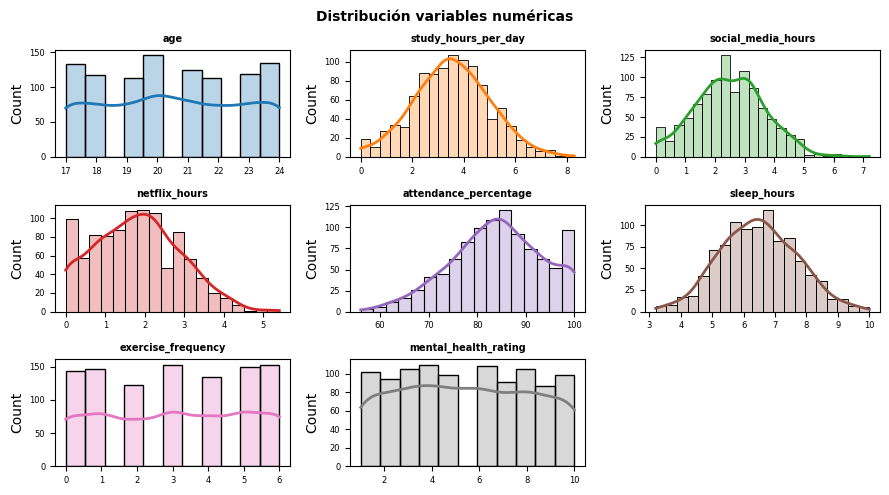

In [ ]:
#Histograma para ver dsitribución
#df[numeric_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
#plt.suptitle('Histograma de Variables Numéricas', fontsize=16)
#plt.tight_layout()
#plt.show()
#----------------------------------------------------------------------------------------

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dfNumerico.columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = dfNumerico,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

for i in [8]:
  fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


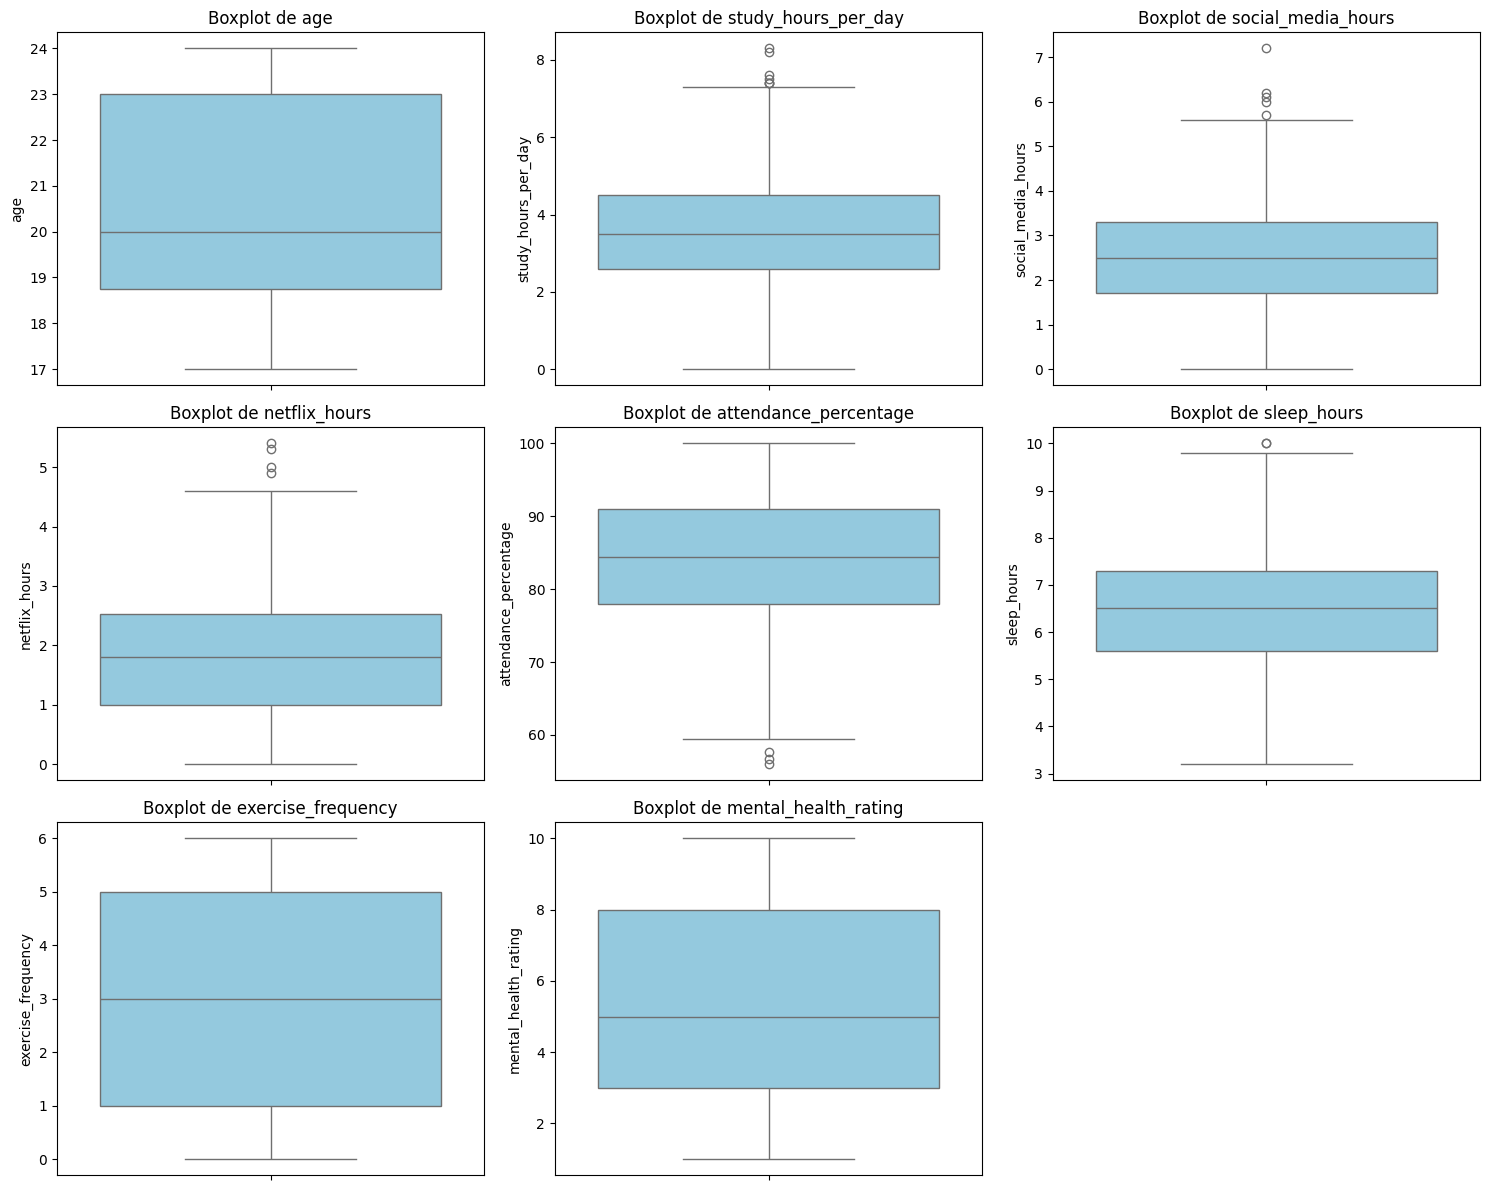

In [ ]:
#Boxplots para detectar outliers
import math
n_cols = 3
n = len(columnas_numeric)
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(columnas_numeric):
   ax = plt.subplot(n_rows, n_cols, i + 1)
   sns.boxplot(data=df, y=col, color='skyblue', ax=ax)
   plt.title(f'Boxplot de {col}')
   plt.tight_layout()
plt.show()


Podemos observar outlaiers en las variables study_hours_per_day,

social_media_hours, netflix_hours,attedance_percetage y sleep_hours y exam_score


---




### Como el objetivo del estudio es predecir la nota de examen, el análisis de cada variable se hace también en relación a la variable respuesta 'exam_score'. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con la nota de examen y de qué forma.

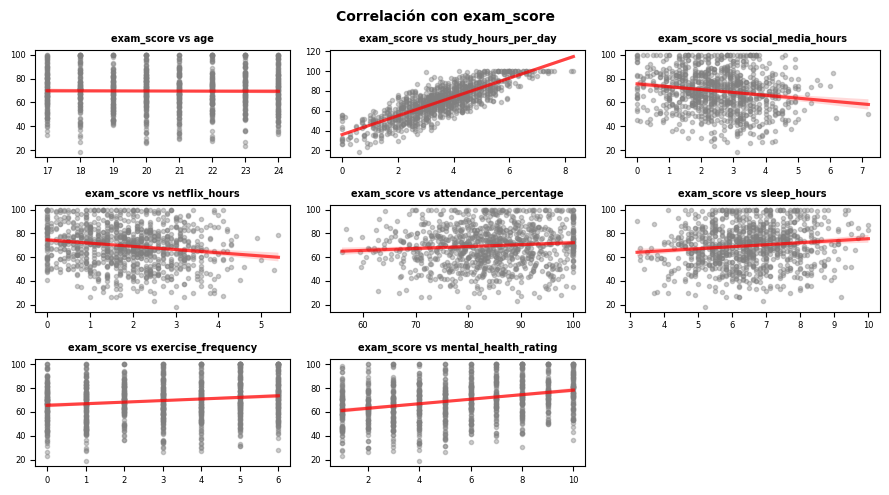

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('exam_score')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['exam_score'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"exam_score vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con exam_score', fontsize = 10, fontweight = "bold");

### Como algunas de las variables predictoras pueden ser colineales o estar correlacionas y esto afecta la precision ya que me aportan información repetida de los modelos de regresion y pueden desencadenar los siguientes problemas:


*   **Los coeficientes del modelo se vuelven inestables.**
      Pequeños cambios en los datos pueden provocar grandes cambios en los coeficientes

*   **Dificulta la interpretación de los coeficientes.**
      No sabés bien cuál variable está "explicando" el efecto.

*   **Puede ocultar relaciones reales.**
      Algunas variables pueden parecer poco importantes solo porque están solapadas con otras.

*   **Puede provocar que el modelo no sea generalizable.**
      Es decir, puede funcionar bien en el entrenamiento, pero mal en nuevos datos.





### Vamos a intentar ver que coeficiente de correlacion de Pearson tienen las variables, esto para q sea mas legible se hace con el formato Tidy

In [ ]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)


,variable_1,variable_2,r,abs_r
73,exam_score,study_hours_per_day,0.825419,0.825419
17,study_hours_per_day,exam_score,0.825419,0.825419
79,exam_score,mental_health_rating,0.321523,0.321523
71,mental_health_rating,exam_score,0.321523,0.321523
35,netflix_hours,exam_score,-0.171779,0.171779
75,exam_score,netflix_hours,-0.171779,0.171779
74,exam_score,social_media_hours,-0.166733,0.166733
26,social_media_hours,exam_score,-0.166733,0.166733
62,exercise_frequency,exam_score,0.160107,0.160107
78,exam_score,exercise_frequency,0.160107,0.160107


## Así obtuvimos un "Ranking" de las variables que estan mas fuertemente correlacionadas.
Lo cual nos da un pantallazo para ver que ningun r está por encima de 0,8 a excepción de study_hours_per_day con exam_score.

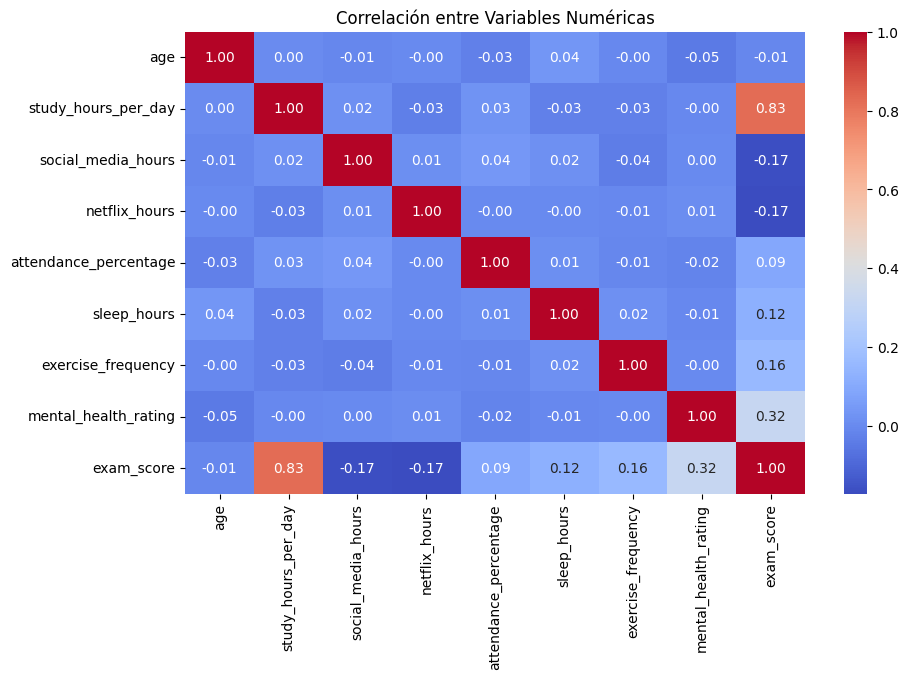

In [ ]:
#Correlacion entre variable numericas
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['float64', 'int']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Numéricas')
plt.show()


Un coeficiente de 0.83 entre Study_hours_per_day y exam_score indica una relacion lineal fuerte y positiva, conforme aumentan las horas de estudio diarias , tienden a subir las notas de examen.



### Preparación del Dataset para realizar el modelo supervisado (Random Forest)

### Variables numéricas ya listas:
age, study_hours_per_day, social_media_hours, netflix_hours,

attendance_percentage, sleep_hours, exercise_frequency, mental_health_rating.

### Variables categóricas que debemos codificar:


*   gender (Male/Female)
*   part_time_job (Yes/No)
*   diet_quality (Poor/Fair/Good)
*   parental_education_level (High School, Master...)
*   internet_quality (Poor/Average/Good)
*   extracurricular_participation (Yes/No)



### Usamos OneHotEncoder ya que las caracteristicas de las variables no siguen un orden y queremos evitar introducir errores

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df = df.drop(columns=["student_id"])

# separamos entre predictores y variable objetivo
X = df.drop('exam_score',axis = 1)
y = df['exam_score']

columnas_cat = [
    'gender', 'part_time_job', 'diet_quality',
    'parental_education_level', 'internet_quality',
    'extracurricular_participation'
]

# Aplicamos OneHotEncoding para 'Vectorizar' nuestras columnas categoricas

procesamiento = ColumnTransformer(
    transformers = [('categoria', OneHotEncoder(drop="first"), columnas_cat)],
    remainder='passthrough'
)

# Creamos un pipeline porque es mas facil llamarlo en vez de hacer la vectorizacion para cada columna cat

pipeline = Pipeline(steps=[
    ("Tratamiento", procesamiento),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Separamos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
pipeline.fit(X_train, y_train)

# Predecimos
y_pred = pipeline.predict(X_test)

### Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 38.51
R^2: 0.85


### Podemos probar las regularizaciones de lasso(L1) y ridge(L2) y comparar con random forest para ver cual estima mejor:

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grilla = [
    {
        "regressor": [Lasso()],
        "regressor__alpha": [0.01, 0.1, 1, 10]
    },
    {
        "regressor": [Ridge()],
        "regressor__alpha": [0.01, 0.1, 1, 10]
    },
    {
        "regressor": [RandomForestRegressor(random_state=42)],
        "regressor__n_estimators": [50, 100],
        "regressor__max_depth": [None, 10, 20]
    }
]

grid = GridSearchCV(pipeline, param_grilla, cv=5, scoring="neg_mean_squared_error")

In [ ]:
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)

#columnas utiles
cols_utiles = [
    "param_regressor", "param_regressor__alpha", "param_regressor__n_estimators",
    "param_regressor__max_depth", "mean_test_score", "rank_test_score"
]

# Mostrar solo las columnas relevantes
print(resultados[cols_utiles].sort_values("rank_test_score").head(15))

                           param_regressor  param_regressor__alpha  \
1                                  Lasso()                    0.10   
0                                  Lasso()                    0.01   
7                                  Ridge()                   10.00   
6                                  Ridge()                    1.00   
5                                  Ridge()                    0.10   
4                                  Ridge()                    0.01   
2                                  Lasso()                    1.00   
9   RandomForestRegressor(random_state=42)                     NaN   
13  RandomForestRegressor(random_state=42)                     NaN   
11  RandomForestRegressor(random_state=42)                     NaN   
12  RandomForestRegressor(random_state=42)                     NaN   
8   RandomForestRegressor(random_state=42)                     NaN   
10  RandomForestRegressor(random_state=42)                     NaN   
3                   

In [ ]:
mejor_modelo = grid.best_estimator_
# Predecir sobre el conjunto de test
y_pred = mejor_modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Evaluación del mejor modelo en el set de test:")
print(f"MSE: {mse:.2f}")
print(f"R² : {r2:.2f}")

Evaluación del mejor modelo en el set de test:
MSE: 26.02
R² : 0.90


### Viendo el resumen de las 15 mejores combinaciones de modelo y parámetros probadas por GridSearchCV, ordenadas por desempeño (mejor rank_test_score). La primera fila (índice 1) es el mejor modelo:
Modelo: Lasso()

Alpha: 0.10

Mean Test Score: -29.73

(se suele usar el negativo del error cuadratico medio, mientras ams cerca a 0 mejor)



---



### Seleccinamos el mejor de cada modelo

In [ ]:
mejores_modelos = {}

for modelo in ["Lasso", "Ridge", "RandomForest"]:
    mascara = resultados["param_regressor"].astype(str).str.contains(modelo)
    mejor = resultados[mascara].sort_values("rank_test_score").iloc[0]
    mejores_modelos[modelo] = mejor["params"]

### Rentrenamos y evaluamos cada modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

metricas = []

for nombre, params in mejores_modelos.items():
    # Extraer el modelo base
    modelo = params["regressor"]

    # Setear hiperparámetros
    for k, v in params.items():
        if k.startswith("regressor__"):
            setattr(modelo, k.split("__")[1], v)

    # Crear el pipeline
    pipe = Pipeline([
        ("preprocessing", procesamiento),
        ("regressor", modelo)
    ])

    # Entrenar y predecir
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    metricas.append({
        "Modelo": nombre,
        "MSE": mse,
        "R²": r2
    })

In [ ]:
df_metricas = pd.DataFrame(metricas)
print(df_metricas)

         Modelo        MSE        R²
0         Lasso  26.021890  0.898522
1         Ridge  26.519212  0.896583
2  RandomForest  38.511871  0.849815


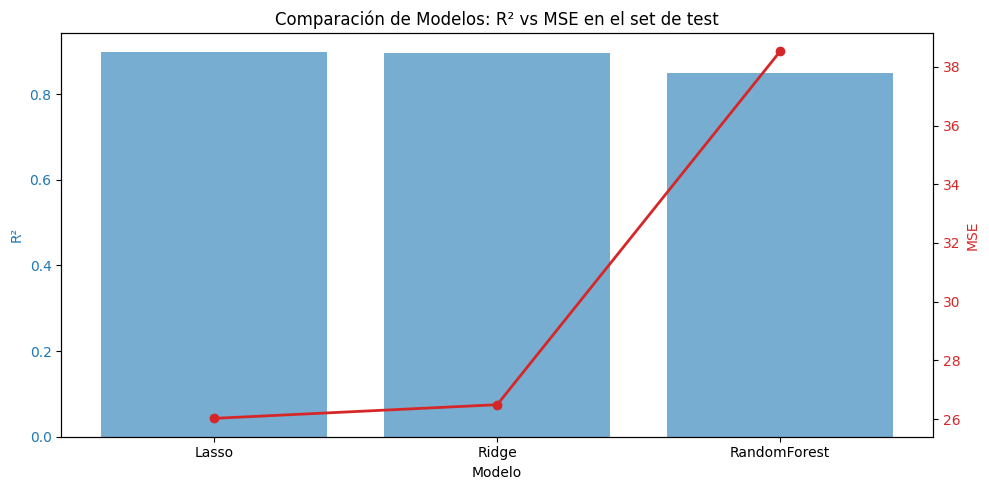

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje 1: R² como barras
color = "tab:blue"
ax1.set_xlabel("Modelo")
ax1.set_ylabel("R²", color=color)
ax1.bar(df_metricas["Modelo"], df_metricas["R²"], color=color, alpha=0.6)
ax1.tick_params(axis="y", labelcolor=color)

# Eje 2: MSE como línea
ax2 = ax1.twinx()  # Segundo eje y
color = "tab:red"
ax2.set_ylabel("MSE", color=color)
ax2.plot(df_metricas["Modelo"], df_metricas["MSE"], color=color, marker="o", linewidth=2)
ax2.tick_params(axis="y", labelcolor=color)

# Título
plt.title("Comparación de Modelos: R² vs MSE en el set de test")
fig.tight_layout()
plt.show()

### Resumen
*El conjunto de entrenamiento (X_train, y_train) se usó para:*

1. Ajustar el pipeline con GridSearchCV.

2. Encontrar la mejor combinación de hiperparámetros.

*El conjunto de test es como un "examen final":*

1. Se usa una única vez al final.

2. Mide el rendimiento del modelo sobre datos que nunca vio antes.

3. Sirve para evaluar si el modelo generaliza bien.



### Analisis con FairLear
#### Buscamos ver si el modelo favorece o perjudica más a ciertos grupos.
es decir, vamos a analizar la equidad con Fairlearn sobre nuestro mejor modelo, usando las variables más sensibles. En este contexto, las más comunes suelen ser:

* gender

* parental_education_level

* internet_quality

* mental_health_rating

Estas variables pueden reflejar condiciones sociales o estructurales que podrían estar asociadas a desigualdades.



In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.7 MB/s eta 0:00:00


In [ ]:
from fairlearn.metrics import MetricFrame

#from fairlearn.widget import FairlearnDashboard


 Métricas por grupo para: Gender
              MSE        R²
gender                     
Female  23.987103  0.906863
Male    29.027161  0.887745
Other    8.683028  0.950964


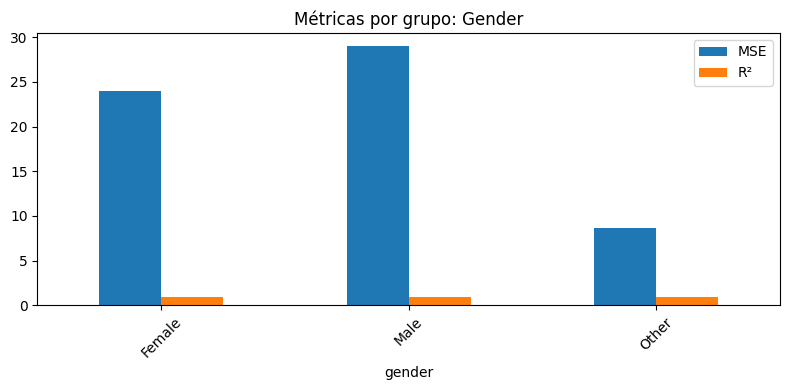


 Métricas por grupo para: Parental Education
                                MSE        R²
parental_education_level                     
Bachelor                  23.131643  0.922429
High School               30.927536  0.866287
Master                    21.331236  0.899390


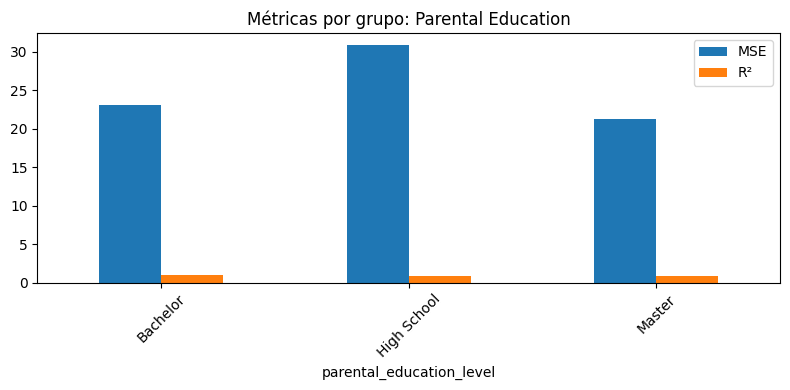


 Métricas por grupo para: Internet Quality
                        MSE        R²
internet_quality                     
Average           27.419395  0.901109
Good              25.316311  0.884635
Poor              25.321964  0.896796


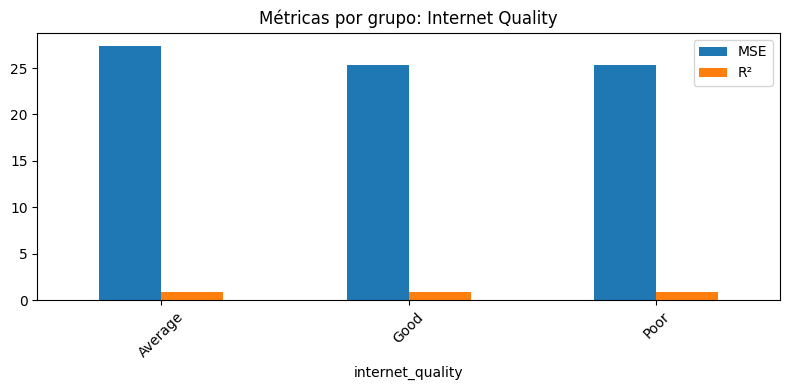


 Métricas por grupo para: Mental Health Rating
                            MSE        R²
mental_health_rating                     
1                     30.566576  0.923623
2                     25.258491  0.870511
3                     31.332563  0.813157
4                     31.397676  0.896664
5                     25.468798  0.903109
6                     26.222145  0.862892
7                     18.982704  0.904071
8                     24.375117  0.875011
9                     17.630620  0.784481
10                    25.806208  0.897088


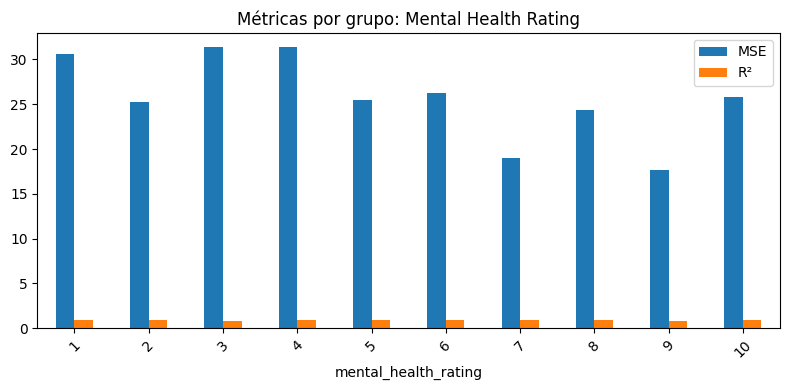

In [ ]:
###Variables sensibles a evaluar
sensitive_features = {
    "Gender": X_test["gender"],
    "Parental Education": X_test["parental_education_level"],
    "Internet Quality": X_test["internet_quality"],
    "Mental Health Rating": X_test["mental_health_rating"]
}

# Evaluamos con las métricas clásicas
metrics = {
    "MSE": mean_squared_error,
    "R²": r2_score
}

# Diccionario para guardar resultados por grupo
resultados_equidad = {}

for nombre, feature in sensitive_features.items():
    mf = MetricFrame(
        metrics=metrics,
        y_true=y_test,
        y_pred=mejor_modelo.predict(X_test),
        sensitive_features=feature
    )
    resultados_equidad[nombre] = mf
    print(f"\n Métricas por grupo para: {nombre}")
    print(mf.by_group)

    # Gráfico
    mf.by_group.plot(kind="bar", title=f"Métricas por grupo: {nombre}", figsize=(8, 4))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### CONCLUSIONES SOBRE FAIRLEARN:


1.   **Género (Gender)**:
      MSE (Error cuadrático medio): El modelo es más preciso para "Other", con un error más bajo. Tiene un peor rendimiento para "Male".

      R² (Coef. de determinación): Aunque todos los valores son buenos (>0.88), hay una pequeña diferencia entre "Other" (0.95) y "Male" (0.88).

      **Conclusión:** No hay disparidades graves, pero podríamos monitorear el desempeño en "Male", que tiene el peor error. El grupo "Other" es pequeño probablemente, lo cual también puede sesgar esta métrica.


2.   **Nivel educativo de los padres (Parental Education):**
      El modelo rinde peor en estudiantes con padres que tienen solo secundaria, tanto en MSE como en R².

      Las mejores métricas son para quienes tienen padres con estudios superiores.

      **Conclusión:** Hay disparidad notable. El modelo es menos preciso para estudiantes con menor nivel educativo en el hogar, lo cual puede reforzar desigualdades.


3.    **Calidad de Internet (Internet Quality):**
      Muy consistente entre grupos. Las diferencias en MSE y R² son mínimas.

      **Conclusión:** No hay disparidad significativa por calidad de internet.

4.    **Salud mental (Mental Health Rating):**
      Claramente, el modelo predice peor para estudiantes con puntajes medios de salud mental (ej.: 3 y 4).

      Predice mejor para puntajes altos (7, 9).

      **Conclusión:** Posible sesgo relacionado al estado emocional o bienestar. Sería interesante ver si estas categorías están correlacionadas con otras variables (como sueño, dieta, etc.).


---




## **Probando Modelos con Pycaret**
### ¿Qué hace PyCaret?
PyCaret automatiza muchas tareas comunes del flujo de trabajo de machine learning, como:

* Preprocesamiento de datos (limpieza, codificación, escalado, imputación, etc.)

* Entrenamiento de múltiples modelos con una sola línea de código

* Comparación automática de modelos

* Selección del mejor modelo

* Optimización de hiperparámetros

* Interpretación del modelo

* Guardado y despliegue del modelo


---



### A continuacion instalamos las librerias de mlflow, Pycaret y ngrok la cual nos permite utilizar un proxy reverso ya que estamos trabajando con google colab.
### **ngrok** es una herramienta que nos permite crear un túnel seguro desde internet a tu computadora o servidor local. Es como abrir una puerta temporal en internet para acceder a algo que estás ejecutando localmente.

## **¿Para qué sirve?**
### Por ejemplo, si tenemos una aplicación web o un servidor en nuestra máquina o en Google Colab, con ngrok podemos obtener un link público (como https://xyz.ngrok.io) para acceder a esa app desde cualquier navegador, incluso desde el celular o mostrarla a otra persona.

### **MLFLOW**:
### Es una app o servicio que permite hacer todo el tracking de los modelos de machine learning desde el inicio hasta su despliegue. Es decir nos ayuda a gestionar el ciclo de vida completo de un modelo de Machine Learning.

### **FLask**:
### Vamos a necesitar flask para el despliegue ya que queres acer una api para poder ahcer consultas con nuestro modelo, para esto necesitamos un servicio web o web service o pequeño server web donde podamos alojar y consultar nuestra API esto nos los da flask.

### Entonces que nos permite hacer el Framework web llamado flask?:


*   Recibir y responder a peticiones HTTP (como cuando alguien entra a un sitio)
*   Enviar HTML al navegador
*   Enviar HTML al navegador
*   Crear formularios y rutas (páginas distintas)
*   Hacer APIs REST (muy usado en machine learning)




In [ ]:
!pip install pyngrok flask
!pip uninstall -y pycaret mlflow #desisntalamos pycaret y mlflow por si hay alguna version previamente instalada
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
!pip install mlflow==2.16.0 # instalamos esta version porque es la que está andando con pycaret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found ex

### ¿ Donde guardamos los datos de mlflow?
### Como estamos usando Colab que está en el ecosistema de google los guardamos en el google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Definimos dónde MLflow guardará todo:
MLFLOW_ROOT = "/content/drive/MyDrive/mlflow_runs"

## Configuramos MLFlow

In [ ]:
import mlflow
mlflow.set_tracking_uri(f"file://{MLFLOW_ROOT}")

### Arrancamos MLFlow

In [ ]:
import subprocess, time
mlflow_server = subprocess.Popen([
    "mlflow", "ui",
    "--backend-store-uri", f"file://{MLFLOW_ROOT}",
    "--port", "5000"
])
time.sleep(5)

# Usamos NGROK para proxy reverso y poder acceder.
from pyngrok import ngrok, conf
import getpass

print("Ingresar auth token de ngrok:  https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel "{public_url}" -> "http://127.0.0.1:{port}"')


Ingresar auth token de ngrok:  https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://314a-34-21-56-251.ngrok-free.app" -> "http://127.0.0.1:5000"


### Antes de configurar y usar Pycaret debemos preparar nuevamene nuestro dataset

In [ ]:
#df = df.drop(columns=["student_id"])


# Columnas categóricas
#categorical_cols = [
#    "gender",
#    "part_time_job",
#    "diet_quality",
#    "parental_education_level",
#    "internet_quality",
#    "extracurricular_participation"
#]

# One-hot encoding
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convertir booleanos a 0/1
#df_encoded = df_encoded.astype(int)

# Ver resultado
#print(df_encoded.head())



# Definimos columnas categóricas
categorical_cols = [
    "gender",
    "part_time_job",
    "diet_quality",
    "parental_education_level",
    "internet_quality",
    "extracurricular_participation"
]


# Aplicar One-Hot Encoding (NO eliminamos ninguna categoría)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Convertir posibles valores booleanos a enteros (True/False → 1/0)
df_encoded = df_encoded.astype(int)

# Mostrar las primeras filas para verificar
print(df_encoded.head())
print(df_encoded.columns.tolist())

   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                    0                   1              1   
1   20                    6                   2              2   
2   21                    1                   3              1   
3   23                    1                   3              1   
4   19                    5                   4              0   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                     85            8                   6   
1                     97            4                   6   
2                     94            8                   1   
3                     71            9                   4   
4                     90            4                   3   

   mental_health_rating  exam_score  gender_Female  ...  diet_quality_Good  \
0                     8          56              1  ...                  0   
1                     8         100              1  ...                  1   
2 

### Cargamos y configuramos PyCaret con MLFlow para hacer el seguimiento

In [ ]:
from pycaret.regression import setup, compare_models, finalize_model, save_model

#Creamos el experimento en MLflow
mlflow.set_experiment("Predicciones con el dataset Desempeño académico de los estudiantes en base a sus hábitos2")

exp = setup(
    data=df_encoded,
    target='exam_score',
    session_id=42,
    log_experiment=True,
    experiment_name='Predicciones con el dataset Desempeño académico de los estudiantes en base a sus hábitos2',
    log_plots=True          # registra gráficos (conf matrix, etc.)
)

2025/05/29 19:26:03 INFO mlflow.tracking.fluent: Experiment with name 'Predicciones con el dataset Desempeño académico de los estudiantes en base a sus hábitos2' does not exist. Creating a new experiment.


,Description,Value
0,Session id,42
1,Target,exam_score
2,Target type,Regression
3,Original data shape,"(1000, 25)"
4,Transformed data shape,"(1000, 25)"
5,Transformed train set shape,"(700, 25)"
6,Transformed test set shape,"(300, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


### Entrenamos y comparamos los modelos.

In [ ]:
best = compare_models()

# Finaliza el modelo para habilitar predicciones en producción
model = finalize_model(best)

# Guarda localmente (un .pkl) y también registra en MLflow
save_model(model, 'modelo_Estudiantes')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,4.8845,38.0187,6.1569,0.8612,0.0961,0.0767,0.0460
br,Bayesian Ridge,4.8821,38.0472,6.1592,0.8612,0.0962,0.0767,0.0490
ridge,Ridge Regression,4.8831,38.0744,6.1614,0.8611,0.0962,0.0767,0.0370
lr,Linear Regression,4.8834,38.0819,6.1619,0.8610,0.0961,0.0767,0.6340
huber,Huber Regressor,4.9207,38.5728,6.2032,0.8593,0.0962,0.0769,0.0800
lasso,Lasso Regression,5.0495,40.4248,6.3470,0.8539,0.1018,0.0808,0.0390
llar,Lasso Least Angle Regression,5.0496,40.4248,6.3470,0.8539,0.1018,0.0808,0.0460
gbr,Gradient Boosting Regressor,5.0988,41.3961,6.4049,0.8465,0.1020,0.0807,0.1290
lightgbm,Light Gradient Boosting Machine,5.2523,43.5820,6.5761,0.8382,0.1046,0.0832,0.2370
en,Elastic Net,5.6516,49.6289,7.0317,0.8224,0.1163,0.0927,0.0400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



2025/05/29 19:27:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/29 19:27:07 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'study_hours_per_day',
                                              'social_media_hours',
                                              'netflix_hours',
                                              'attendance_percentage',
                                              'sleep_hours',
                                              'exercise_frequency',
                                              'mental_health_rating',
                                              'gender_Female', 'gender_Male',
                                              'gender_Other', 'part_time_job_No',
                                              'part_time_job_Yes',
                                              'diet_quality_Fair',
                                              'diet...
                                              'internet_quality_Poor',
                        

### en la primera pasada nos arrojó esto:

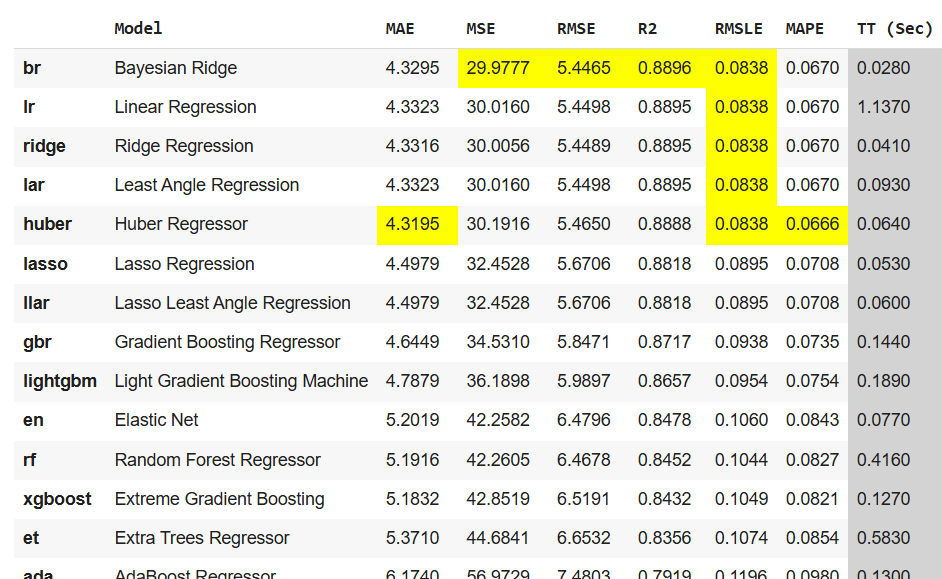

suponemos que es por el método de onehot encoding que usamos ya que este usa variables booleanas, al pasar los booleanos a int(0 y 1 ) nos dió lo que se ve

### Registramos en mlflow

In [ ]:
# Registrar en MLflow
mlflow.sklearn.log_model(model,artifact_path="modelo_Estudiantes") # Mejor Modelo para prod

2025/05/29 19:47:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.




---
### Ahora ponemos en producción la API


In [ ]:
run_id = mlflow.last_active_run().info.run_id
model_uri = f"runs:/{run_id}/modelo_Estudiantes"
print("Model URI:", model_uri)

Model URI: runs:/35364e4131094b159690b5fabd7a3134/modelo_Estudiantes


In [ ]:
! pip install flask_ngrok

In [ ]:
!fuser -k 1234/tcp || true

In [ ]:
!ls /content/drive/MyDrive/mlflow_runs/110792071088175407/$run_id/artifacts/modelo_Estudiantes  # Vemos que el modelo esta dentro de nuestro drive.

conda.yaml  MLmodel  model.pkl	python_env.yaml  requirements.txt


### Ahora que sabemos que nuestro modelo esta y conocemos su ubicación:

In [ ]:
import mlflow.pyfunc

# Ruta al modelo (ajustar al modelo real entrenado)
model_path = f"/content/drive/MyDrive/mlflow_runs/110792071088175407/{run_id}/artifacts/modelo_Estudiantes"
model = mlflow.pyfunc.load_model(model_path) #carga del modelo

### Creamos la Api

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        df = pd.DataFrame(data['data'], columns=data['columns'])

        pred = model.predict(df)
        return jsonify({"prediction": pred.tolist()})
    except Exception as e:
        return jsonify({"error": str(e)})

In [ ]:
from pyngrok import ngrok
import threading

# Crear un túnel a la API Flask
public_url = ngrok.connect(5002)
print(f"🚀 Tu API Flask está disponible en: {public_url}/predict")

# Ejecutar Flask en segundo plano
def run_flask():
    app.run(port=5002)

thread = threading.Thread(target=run_flask)
thread.start()

🚀 Tu API Flask está disponible en: NgrokTunnel: "https://aa83-34-21-56-251.ngrok-free.app" -> "http://localhost:5002"/predict


### Los datos deben enviarse en el mismo orden con el que fueron entrenados (obviamente sin exam_score):
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score', 'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No', 'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_Bachelor', 'parental_education_level_High School', 'parental_education_level_Master', 'internet_quality_Average', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_No', 'extracurricular_participation_Yes']

In [ ]:
lista = df_encoded.head(2).values.tolist()
print(lista)

[[23, 0, 1, 1, 85, 8, 6, 8, 56, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], [20, 6, 2, 2, 97, 4, 6, 8, 100, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]]


In [ ]:
import requests

sample = {
  "columns": [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours',
    'exercise_frequency', 'mental_health_rating', 'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
    'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_Bachelor', 'parental_education_level_High School',
    'parental_education_level_Master', 'internet_quality_Average', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_No', 'extracurricular_participation_Yes'
  ],
  "data": [
    [23, 0, 1, 1, 85, 8, 6, 8, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], # Nota les borre a mano el exam score
    [20, 6, 2, 2, 97, 4, 6, 8, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]
  ]
}
response = requests.post("https://aa83-34-21-56-251.ngrok-free.app/predict", json=sample)
print("Status code:", response.status_code)
print("Response text:", response.text)  # Esto te muestra qué devolvió el servidor (aunque no sea JSON)
try:
    data = response.json()
    print("JSON response:", data)
except Exception as e:
    print("Error decodificando JSON:", e)

INFO:werkzeug:127.0.0.1 - - [29/May/2025 20:58:07] "POST /predict HTTP/1.1" 200 -


Status code: 200
Response text: {"prediction":[56.60895414159046,101.74224075523848]}

JSON response: {'prediction': [56.60895414159046, 101.74224075523848]}


### Si nos fijamos el exam_score de los primeros 2 estudiantes:

In [ ]:
print(df_encoded['exam_score'].head(2))

0     56
1    100
Name: exam_score, dtype: int64


### La prediccion del mejor Modelo propuesto por Pycaret que es Bayesian Ridge nos dice que el primer alumno obtendrá un 56,6 de nota basado en sus habitos y el segundo alumno un 101,7 lo cual es muy certero pero tambien vemos que se va de rango. Esto puede deberse a:

* El modelo no está restringido a ese rango.

* Los datos de entrenamiento incluían valores atípicos.

* O no normalizamos adecuadamente ni restringimos el output.